<a href="https://colab.research.google.com/github/Psousace/Trading_Dados/blob/main/TD_Simula%C3%A7%C3%A3o_de_Carteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação Carteira
###Link Video: https://www.youtube.com/watch?v=4GCwf6CVHr8

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

# **Simulação de Carteiras**

<center><img src = "https://github.com/victorncg/financas_quantitativas/blob/main/Captura%20de%20tela%202023-07-25%20154454.png?raw=true" width = "500">




**Para fins de simplificação**

* Apenas um aporte em cada ação
* Os aportes foram todos no mesmo dia

# 1. Importação das bibliotecas

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Configurar a nossa carteira

In [ ]:
compras = {'VALE3.SA': 1400, 'WEGE3.SA': 1300,
          'BPAC11.SA': 1100, 'KNRI11.SA': 1000,
        	'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500,
		      'PETR4.SA': 1000,'COCA34.SA': 1000}

In [ ]:
list(compras.keys())

['VALE3.SA',
 'WEGE3.SA',
 'BPAC11.SA',
 'KNRI11.SA',
 'SMAL11.SA',
 'AAPL34.SA',
 'IVVB11.SA',
 'PETR4.SA',
 'COCA34.SA']

In [ ]:
sum(compras.values())

8800

# 3. Importando os dados

In [ ]:
inicio = '2020-01-01'
fim = '2023-07-01'

In [ ]:
precos = yf.download(list(compras.keys()), start = inicio, end = fim, progress = False)['Adj Close']

# 4. Simulação da carteira fictícia

In [ ]:
primeiro = precos.iloc[0] # preços na data de compra

In [ ]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = round(compras_df/primeiro, 0)

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
PL.head()

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,
2020-01-02,695.371324,1102.441841,989.487492,562.400024,1071.063446,997.293391,837.000000,1383.115265,1307.958721,8946.131504
2020-01-03,696.746798,1105.641180,975.998283,562.799988,1071.063446,989.172082,845.399963,1372.932175,1291.256847,8911.010762
2020-01-06,700.185191,1104.041571,978.863613,564.799988,1062.370514,1000.866699,834.600037,1364.785812,1294.597103,8905.110528
2020-01-07,701.904366,1108.446264,978.863613,565.200012,1066.502106,996.968575,836.399963,1374.714294,1304.618465,8933.617659
2020-01-08,707.807156,1098.622822,978.378628,566.200012,1006.134155,990.796165,829.199982,1374.968765,1255.254776,8807.362461


In [ ]:
PL.tail()

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,
2023-06-26,2068.961716,1872.574207,1408.529991,912.000000,927.422516,2525.144997,649.500000,2307.816376,2828.599434,15500.549236
2023-06-27,2121.530487,1860.750051,1420.130035,928.080017,930.435699,2505.494032,637.800018,2335.423370,2836.370453,15576.014164
2023-06-28,2149.692406,1866.973291,1414.910027,938.960022,939.416290,2529.238806,638.099991,2261.687943,2842.587090,15581.565865
2023-06-29,2160.487682,1926.094191,1409.399956,940.000000,950.051239,2540.701990,652.800018,2289.295074,2862.791382,15731.621532
2023-06-30,2174.099258,1957.210390,1397.800022,941.000000,943.965729,2417.883663,657.000000,2244.215012,2933.506256,15666.680330


# 5. Comparação com o IBOV

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibov = pd.DataFrame(ibov)

In [ ]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

Juntando tudo num dataframe só

In [ ]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
consolidado.head()

,IBOV,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2020-01-02,118573.0,695.371324,1102.441841,989.487492,562.400024,1071.063446,997.293391,837.000000,1383.115265,1307.958721,8946.131504
2020-01-03,117707.0,696.746798,1105.641180,975.998283,562.799988,1071.063446,989.172082,845.399963,1372.932175,1291.256847,8911.010762
2020-01-06,116878.0,700.185191,1104.041571,978.863613,564.799988,1062.370514,1000.866699,834.600037,1364.785812,1294.597103,8905.110528
2020-01-07,116662.0,701.904366,1108.446264,978.863613,565.200012,1066.502106,996.968575,836.399963,1374.714294,1304.618465,8933.617659
2020-01-08,116247.0,707.807156,1098.622822,978.378628,566.200012,1006.134155,990.796165,829.199982,1374.968765,1255.254776,8807.362461


Normalizando os dados para ajustar a escala

In [ ]:
consolidado_ajustado = consolidado/consolidado.iloc[0]

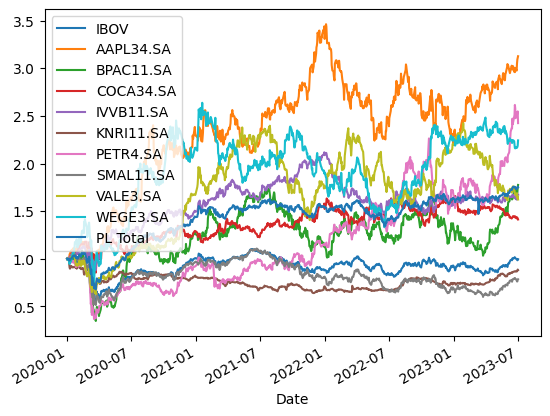

In [ ]:
consolidado_ajustado.plot();

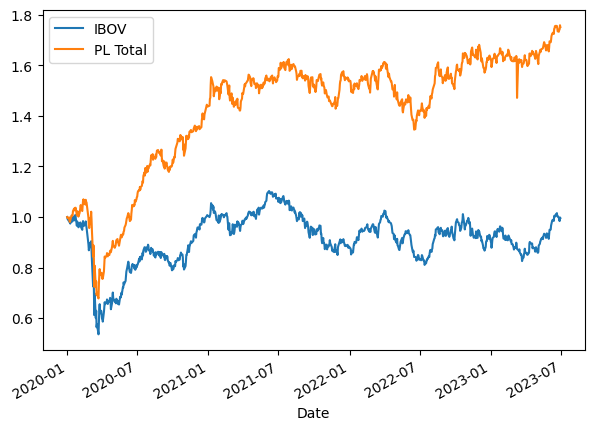

In [ ]:
consolidado_ajustado[['IBOV', 'PL Total']].plot(figsize = (7,5));

# 6. Função para testar carteiras

In [ ]:
def simulacao_carteira(inicio, fim, carteira):
  precos = yf.download(list(carteira.keys()), start = inicio, end = fim, progress = False)['Adj Close']
  primeiro = precos.iloc[0]
  compras_df = pd.Series(data = carteira, index = list(carteira.keys()))
  qtd_acoes = compras_df/primeiro
  qtd_acoes = round(qtd_acoes,0)
  PL = precos*qtd_acoes
  PL['PL Total'] = PL.sum(axis = 1)
  ibov = yf.download('^BVSP', start = inicio, end =  fim, progress = False)
  ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
  ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)
  consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')
  consolidado_adj = consolidado/consolidado.iloc[0]
  consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6));

In [ ]:
portfolio = {'PETR4.SA': 2000, 'ITUB4.SA': 1000, 'WEGE3.SA': 2000, 'VALE3.SA': 1000}

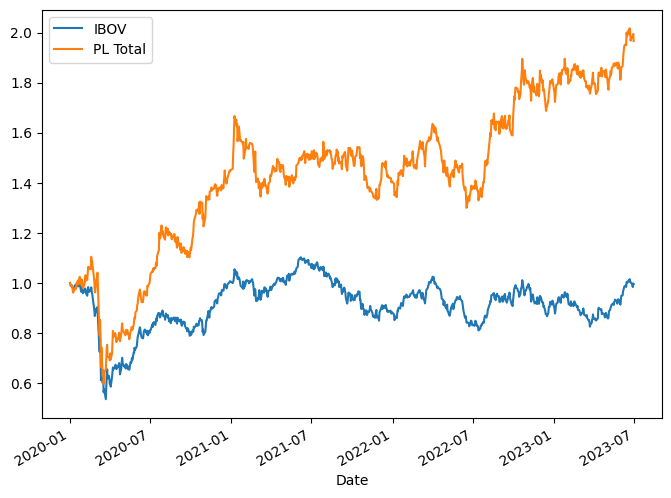

In [ ]:
simulacao_carteira(inicio, fim, portfolio)